### Experiment Modifications Visualizations Lab 2
This notebook is inteded to be used to plot/visualize outputs from the Sensitivity Analysis Modification Experimental Runs as part of Workshop Lab 2

The workflow overview consits of :

1.)Importing all libraries

2.) Importing basecase and modification netcdf files

    - conversion to dataframes

3.) Plots:

    - GPP/RH vs Air Temperature (control, modified) across both EML and TFS
    
    - Active Layer Depth (control, modified) across both EML and TFS


Read in all necessary libraries

In [2]:
from functools import reduce
import os
from os.path import exists
import netCDF4 as nc
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime


Here we will be visualizing outputs from two modification experiments:


1.   Summer warming experiment (increased tair(May-Sep) by 25%
2.   Winter warming experiment (increased tair(November-March) by 25%

For Sites Eight Mile Lake-CiPEHR and Toolik 

#### Set your variables here

- VAR = the output variable you wish to analyze
- fdir= will be the path to your Workshop folder 
- experiment= winter or summer warming
- site1 = EML
- site2 = Toolik
- timeres= yearly or monthly, for the variables we will plot this will remain monthly

In [3]:
pwd

'C:\\Users\\vbriones\\Downloads'

In [306]:
VAR = 'GPP'
fdir="/home/vbriones/tem-output/workshop-lab2/"
experiment='summer-warming'
site1='EML/'
site2='Toolik/'
timeres='monthly'

### Control
This is your control variable, the output variable was run using an unmodified historic climate dataset

In [307]:
CASE='control'

#Read in Eight Mile Lake Control
for i in fdir:
        filename = fdir+experiment+'/'+site1+CASE+'/output/'+VAR+'_'+timeres+'_'+'tr.nc'
        emlbasecase = xr.open_dataset(filename, decode_times=False)
        units, reference_date = emlbasecase.time.attrs['units'].split('since')
        emlbasecase['time'] = pd.date_range(start=reference_date, periods=emlbasecase.sizes['time'], freq='MS')
        emlbasecase = emlbasecase.to_dataframe().reset_index()
        emlbasecase = emlbasecase[['time',VAR]].drop_duplicates(subset=['time'])
        emlbasecase=emlbasecase.rename(columns={VAR:'Control-'+ VAR})
        #basecase=basecase.set_index('time')
        
#Read in Toolik Control
for j in fdir:
        filename = fdir+experiment+'/'+site2+CASE+'/output/'+VAR+'_'+timeres+'_'+'tr.nc'
        tfsbasecase = xr.open_dataset(filename, decode_times=False)
        units, reference_date = tfsbasecase.time.attrs['units'].split('since')
        tfsbasecase['time'] = pd.date_range(start=reference_date, periods=tfsbasecase.sizes['time'], freq='MS')
        tfsbasecase = tfsbasecase.to_dataframe().reset_index()
        tfsbasecase = tfsbasecase[['time',VAR]].drop_duplicates(subset=['time'])
        tfsbasecase=tfsbasecase.rename(columns={VAR:'Control-'+ VAR})
        #basecase=basecase.set_index('time')
        

### Modified Option 1 for Eight Mile Lake Only
Modification Option 1 modified historic climate data with site observations for EML

In [308]:
CASE1='modopt1'
#Read in Eight Mile Lake Modification Option 1

for k in fdir:
        filename2 = fdir+experiment+'/'+site1+CASE1+'/output/'+VAR+'_'+timeres+'_'+'tr.nc'
        emlmodopt1 = xr.open_dataset(filename2, decode_times=False)
        units, reference_date = emlmodopt1.time.attrs['units'].split('since')
        emlmodopt1['time'] = pd.date_range(start=reference_date, periods=emlmodopt1.sizes['time'], freq='MS')
        emlmodopt1 = emlmodopt1.to_dataframe().reset_index()
        emlmodopt1 = emlmodopt1.drop_duplicates(subset=['time'])
        emlmodopt1 = emlmodopt1[['time',VAR]]
        emlmodopt1=emlmodopt1.rename(columns={VAR:'Modified_Site_Observs-'+ VAR})
        #modopt1=modopt1.set_index('time')
# modopt1.tail()



### Modification Option 3
Modification Option 3 produced variables which have been run using either the summer or winter-warming input climate datasets

In [309]:
CASE3='modopt3'

#Read in Eight Mile Lake Modification Option 3
for l in fdir:
        filename2 = fdir+experiment+'/'+site1+CASE3+'/output/'+VAR+'_'+timeres+'_'+'tr.nc'
        emlmodopt3 = xr.open_dataset(filename2, decode_times=False)
        units, reference_date = emlmodopt3.time.attrs['units'].split('since')
        emlmodopt3['time'] = pd.date_range(start=reference_date, periods=emlmodopt3.sizes['time'], freq='MS')
        emlmodopt3 = emlmodopt3.to_dataframe().reset_index()
        emlmodopt3 = emlmodopt3.drop_duplicates(subset=['time'])
        emlmodopt3 = emlmodopt3[['time',VAR]]
        emlmodopt3=emlmodopt3.rename(columns={VAR:'Warming'+'-'+ VAR})
        #modopt1=modopt1.set_index('time')

#Read in Toolik Field Station Modification Option 1
for m in fdir:
        filename2 = fdir+experiment+'/'+site2+CASE3+'/output/'+VAR+'_'+timeres+'_'+'tr.nc'
        tfsmodopt3 = xr.open_dataset(filename2, decode_times=False)
        units, reference_date = tfsmodopt3.time.attrs['units'].split('since')
        tfsmodopt3['time'] = pd.date_range(start=reference_date, periods=tfsmodopt3.sizes['time'], freq='MS')
        tfsmodopt3 = tfsmodopt3.to_dataframe().reset_index()
        tfsmodopt3 = tfsmodopt3.drop_duplicates(subset=['time'])
        tfsmodopt3 = tfsmodopt3[['time',VAR]]
        tfsmodopt3=tfsmodopt3.rename(columns={VAR:'Warming'+'-'+ VAR})
        #modopt1=modopt1.set_index('time')
# modopt3.tail()

To combine modified and unmodified outputs into one dataframe..

In [310]:
# For Eight Mile Lake
dfs=[emlmodopt1,emlmodopt3,emlbasecase]

#Combine into one dataframe
emldf_merged = reduce(lambda  left,right: pd.merge(left,right,on=['time'],
                                            how='outer'), dfs)
emldf_merged=emldf_merged.set_index('time')
emldf_merged.tail()

,Modified_Site_Observs-GPP,Warming-GPP,Control-GPP
time,,,
2015-08-01,234.396337,241.117164,221.245755
2015-09-01,146.002584,128.009246,145.270512
2015-10-01,0.000000,0.000000,0.000000
2015-11-01,0.000000,0.000000,0.000000
2015-12-01,0.000000,0.000000,0.000000


In [311]:
#For Toolik Field Station
# Note: When outputting variables for Toolik (only include [basecase,modopt3])
dfs2=[tfsmodopt3,tfsbasecase]

#Combine into one dataframe
tfsdf_merged = reduce(lambda  left,right: pd.merge(left,right,on=['time'],
                                            how='outer'), dfs2)
tfsdf_merged=tfsdf_merged.set_index('time')
tfsdf_merged.tail()

,Warming-GPP,Control-GPP
time,,
2015-08-01,200.790019,199.845193
2015-09-01,30.912352,37.866516
2015-10-01,0.000000,0.000000
2015-11-01,0.000000,0.000000
2015-12-01,0.000000,0.000000


Import matplotlib notebook for an interactive plot

In [312]:
%matplotlib notebook

<IPython.core.display.Javascript object>


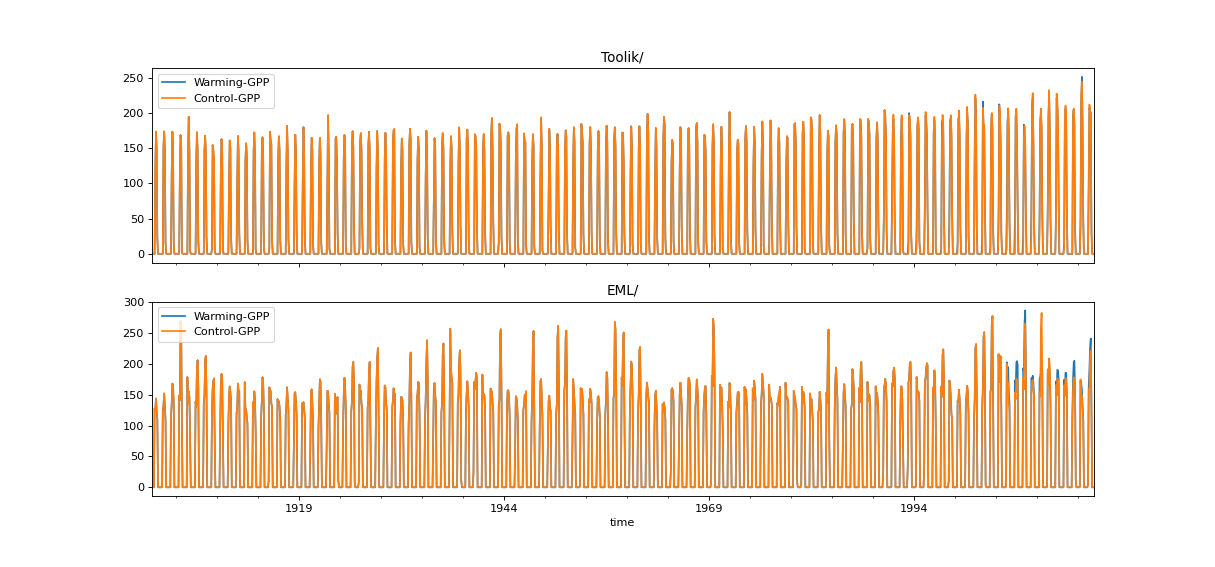

<AxesSubplot:title={'center':'EML/'}, xlabel='time'>

In [314]:
figure, axes = plt.subplots(2,1,figsize=(15,7), sharex='col')

tfsdf_merged[['Warming-'+VAR,'Control-'+VAR]].plot(ax=axes[0],title=site2)
emldf_merged[['Warming-'+VAR,'Control-'+VAR]].plot(ax=axes[1],title=site1)

### Import Historic and Warming Experiment Air Temperature
In this section we will be importing the unmodified historic-climate datasets for EML and Toolik as well as the modified historic climate datasets from the winter/summer warming experiments


NOTE: Be Sure to change the input catalog for the site which you are currently visualizing outputs!!

In [315]:
#Warming Experiment
#This is the path to the unmodified historic-climate dataset for your site used to run the control(basecase)
#EML
fdir1="/home/vbriones/tem-input/dvmdostem-input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_EML_study_area_10x10/"
for x in fdir1:
        filename = fdir1+'historic-climate.nc'
        emlhistair = xr.open_dataset(filename, decode_times=False)
        units, reference_date = emlhistair.time.attrs['units'].split('since')
        emlhistair['time'] = pd.date_range(start=reference_date, periods=emlhistair.sizes['time'], freq='MS')
        emlhistair = emlhistair.to_dataframe().reset_index()
        emlhistair = emlhistair[['time','tair']].drop_duplicates(subset=['time'])
        emlhistair

# TFS
fdir2="/home/vbriones/tem-input/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/"
for y in fdir2:
        filename = fdir2+'historic-climate.nc'
        tfshistair = xr.open_dataset(filename, decode_times=False)
        units, reference_date = tfshistair.time.attrs['units'].split('since')
        tfshistair['time'] = pd.date_range(start=reference_date, periods=tfshistair.sizes['time'], freq='MS')
        tfshistair = tfshistair.to_dataframe().reset_index()
        tfshistair = tfshistair[['time','tair']].drop_duplicates(subset=['time'])
        tfshistair

In [316]:
#Warming Experiment
##EML
MOD='modopt3'
for e in fdir:
        filename = fdir+experiment+'/'+site1+MOD+'/'+'historic-climate-mod.nc'
        emlwarmtair = xr.open_dataset(filename, decode_times=False)
        units, reference_date = emlwarmtair.time.attrs['units'].split('since')
        emlwarmtair['time'] = pd.date_range(start=reference_date, periods=emlwarmtair.sizes['time'], freq='MS')
        emlwarmtair = emlwarmtair.to_dataframe().reset_index()
        emlwarmtair = emlwarmtair[['time','tair']].drop_duplicates(subset=['time'])
        emlwarmtair

#TFS
for f in fdir:
        filename = fdir+experiment+'/'+site2+MOD+'/'+'historic-climate-mod.nc'
        tfswarmtair = xr.open_dataset(filename, decode_times=False)
        units, reference_date = tfswarmtair.time.attrs['units'].split('since')
        tfswarmtair['time'] = pd.date_range(start=reference_date, periods=tfswarmtair.sizes['time'], freq='MS')
        tfswarmtair = tfswarmtair.to_dataframe().reset_index()
        tfswarmtair = tfswarmtair[['time','tair']].drop_duplicates(subset=['time'])
        tfswarmtair



In [320]:
emlcontrol=[emlhistair,emlbasecase]
emlwarming=[emlwarmtair,emlmodopt3]

tfscontrol=[tfshistair,tfsbasecase]
tfswarming=[tfswarmtair,tfsmodopt3]

In [321]:

#Combine into one dataframe
emlcontrol = reduce(lambda  left,right: pd.merge(left,right,on=['time'],
                                            how='outer'), emlcontrol)

emlcontrol=emlcontrol[['time','tair','Control-'+VAR]]
emlcontrol = emlcontrol.sort_values(['time'])



tfscontrol = reduce(lambda  left,right: pd.merge(left,right,on=['time'],
                                            how='outer'), tfscontrol)

tfscontrol=tfscontrol[['time','tair','Control-'+VAR]]
tfscontrol = tfscontrol.sort_values(['time'])


In [322]:
#Combine into one dataframe
emlwarming = reduce(lambda  left,right: pd.merge(left,right,on=['time'],
                                            how='outer'), emlwarming)

emlwarming=emlwarming[['time','tair','Warming-'+VAR]]
emlwarming = emlwarming.sort_values(['time'])



tfswarming = reduce(lambda  left,right: pd.merge(left,right,on=['time'],
                                            how='outer'), tfswarming)

tfswarming=tfswarming[['time','tair','Warming-'+VAR]]
tfswarming = tfswarming.sort_values(['time'])


##### Now you have two dataframes:
- Control: contains unmodified air temperature and control variable
- Warming: contains summer/warming air temperature and modified variable

We will use these dataframes to compare our variable of interest as a function of air temperature (°C)

### Plot Output Variable as a funciton of Air Temperature
Using the dataframes we just created we will now visualize our variable of interest as a function of air temperature (°C)

In [323]:
#Again, notebook allows for an interactive plotting experience.

#To turn this "off" press the power button in the top right corner of the plot r simply ignore this cell
%matplotlib notebook

<IPython.core.display.Javascript object>


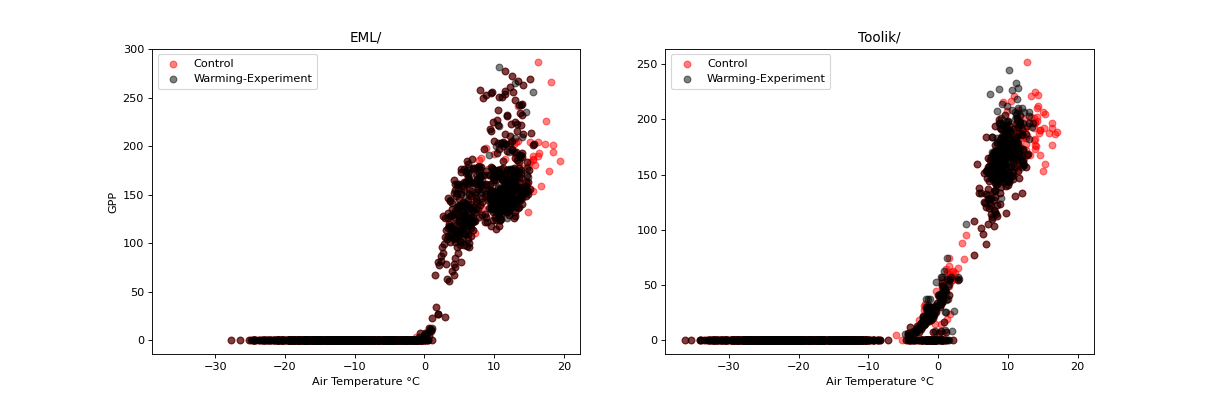

In [324]:

f, (ax1, ax3) = plt.subplots(1, 2,figsize=(15,5), sharex=True)

# Plot EML
ax1.scatter(emlwarming['tair'], emlwarming['Warming-'+VAR],color='red',alpha=.5)
ax1.scatter(emlcontrol['tair'], emlcontrol['Control-'+VAR], color='black',alpha=.5)
ax1.title.set_text(site1)
ax1.set_ylabel(VAR)
ax1.set_xlabel("Air Temperature °C")
ax1.legend(['Control','Warming-Experiment'])


# Plot TFS

ax3.scatter(tfswarming['tair'], tfswarming['Warming-'+VAR],color='red',alpha=.5)
ax3.scatter(tfscontrol['tair'], tfscontrol['Control-'+VAR], color='black',alpha=.5)
ax3.title.set_text(site2)
ax3.set_xlabel("Air Temperature °C")
ax3.legend(['Control','Warming-Experiment'])
# ax3.ylabel(VAR)


We will save our output variables for our site of interest in order to compare across sites

### Visualization for Timeseries

Here we are interested in visualizing our timeseries data from the warming experiments. For this section we will focus on variable Active Layer Depth (ALD)

Like the sections above, we will read in the control and modified option 3 outputs

In [326]:
output='ALD'
site1='EML/'
site2='Toolik/'
timeres='yearly'

In [327]:
CASE='control'
for i in fdir:
        filename = fdir+experiment+'/'+site1+CASE+'/output/'+output+'_'+timeres+'_'+'tr.nc'
        emlbasecase = xr.open_dataset(filename, decode_times=False)
        units, reference_date = emlbasecase.time.attrs['units'].split('since')
        emlbasecase['time'] = pd.date_range(start=reference_date, periods=emlbasecase.sizes['time'], freq='Y')
        emlbasecase = emlbasecase.to_dataframe().reset_index()
        emlbasecase = emlbasecase[['time',output]].drop_duplicates(subset=['time'])
        emlbasecase=emlbasecase.rename(columns={output:'Control-'+ output})
        emlbasecase=emlbasecase.set_index('time')

        
for j in fdir:
        filename = fdir+experiment+'/'+site2+CASE+'/output/'+output+'_'+timeres+'_'+'tr.nc'
        tfsbasecase = xr.open_dataset(filename, decode_times=False)
        units, reference_date = tfsbasecase.time.attrs['units'].split('since')
        tfsbasecase['time'] = pd.date_range(start=reference_date, periods=tfsbasecase.sizes['time'], freq='Y')
        tfsbasecase = tfsbasecase.to_dataframe().reset_index()
        tfsbasecase = tfsbasecase[['time',output]].drop_duplicates(subset=['time'])
        tfsbasecase=tfsbasecase.rename(columns={output:'Control-'+ output})
        tfsbasecase=tfsbasecase.set_index('time')        

In [329]:
CASE3='modopt3'

for k in fdir:
        filename2 = fdir+experiment+'/'+site1+CASE3+'/output/'+output+'_'+timeres+'_'+'tr.nc'
        emlmodopt3 = xr.open_dataset(filename2, decode_times=False)
        units, reference_date = emlmodopt3.time.attrs['units'].split('since')
        emlmodopt3['time'] = pd.date_range(start=reference_date, periods=emlmodopt3.sizes['time'], freq='Y')
        emlmodopt3 = emlmodopt3.to_dataframe().reset_index()
        emlmodopt3 = emlmodopt3.drop_duplicates(subset=['time'])
        emlmodopt3 = emlmodopt3[['time',output]]
        emlmodopt3=emlmodopt3.rename(columns={output:'Warming'+'-'+ output})
        emlmodopt3=emlmodopt3.set_index('time')
        
        
for l in fdir:
        filename2 = fdir+experiment+'/'+site2+CASE3+'/output/'+output+'_'+timeres+'_'+'tr.nc'
        tfsmodopt3 = xr.open_dataset(filename2, decode_times=False)
        units, reference_date = tfsmodopt3.time.attrs['units'].split('since')
        tfsmodopt3['time'] = pd.date_range(start=reference_date, periods=tfsmodopt3.sizes['time'], freq='Y')
        tfsmodopt3 = tfsmodopt3.to_dataframe().reset_index()
        tfsmodopt3 = tfsmodopt3.drop_duplicates(subset=['time'])
        tfsmodopt3 = tfsmodopt3[['time',output]]
        tfsmodopt3=tfsmodopt3.rename(columns={output:'Warming'+'-'+ output})
        tfsmodopt3=tfsmodopt3.set_index('time')        

In [193]:
%matplotlib notebook

##### Now a plot to compare annual ALD warming vs. control for Sites EML and TFS

<IPython.core.display.Javascript object>


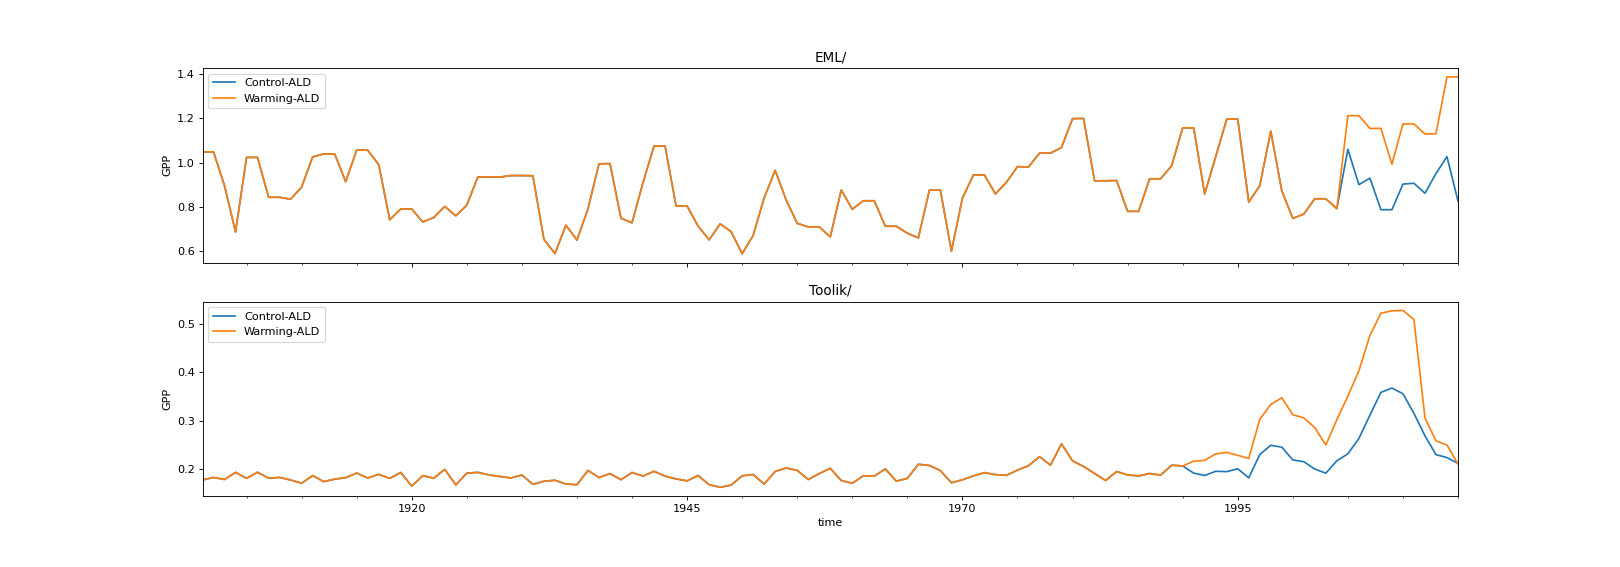

In [333]:
figure, axes = plt.subplots(2,1,figsize=(20,7), sharex='col')

emlald = emlbasecase.plot(ax=axes[0], legend=True,ylabel=VAR,figsize=(20,7),title=site1)
# # Plot second df using ax from the first plot.
_ = emlmodopt3.plot(ax = emlald)


tfsald = tfsbasecase.plot(ax=axes[1], legend=True,ylabel=VAR,title=site2)
# # Plot second df using ax from the first plot.
_ = tfsmodopt3.plot(ax = tfsald)




#### Note: This script is intended to provide a quick and simply way to analyze/visualize the outputs from the Experimental Modifcation Runs. Feel free to use this script as a base to visualiza additional variables not covered in this lab